In [7]:
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer()
data, target = breast_data.data, breast_data.target
columns = breast_data.feature_names

In [8]:
import numpy as np
print(np.unique(target, return_counts=True))

(array([0, 1]), array([212, 357]))


In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                      target,
                                                                      stratify=target,
                                                                      random_state=42,
                                                                      test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=2),
                     LogisticRegression(random_state=42))
pipe.fit(train_input, train_target)
test_predicted = pipe.predict(test_input)
test_acc = pipe.score(test_input, test_target)
print(test_acc)

0.9473684210526315


In [13]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [17]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10).split(train_input, train_target)
scores = []
for k, (train, test) in enumerate(skf):
    pipe.fit(train_input[train], train_target[train])
    score = pipe.score(train_input[test], train_target[test])
    scores.append(score)
    print(f'폴드 : {k+1}, 클래스 분포 {np.bincount(train_target[train])}, 정확도 : {score:.3f}')

폴드 : 1, 클래스 분포 [153 256], 정확도 : 0.935
폴드 : 2, 클래스 분포 [153 256], 정확도 : 0.978
폴드 : 3, 클래스 분포 [153 256], 정확도 : 0.978
폴드 : 4, 클래스 분포 [153 256], 정확도 : 0.978
폴드 : 5, 클래스 분포 [153 256], 정확도 : 0.913
폴드 : 6, 클래스 분포 [153 257], 정확도 : 1.000
폴드 : 7, 클래스 분포 [153 257], 정확도 : 0.956
폴드 : 8, 클래스 분포 [153 257], 정확도 : 0.933
폴드 : 9, 클래스 분포 [153 257], 정확도 : 0.978
폴드 : 10, 클래스 분포 [153 257], 정확도 : 0.911


In [26]:
print(f'{np.mean(scores):.3f}, {np.std(scores):.3f}')

0.956, 0.030


In [30]:
from sklearn.model_selection import cross_validate
cv = cross_validate(estimator=pipe,
                    X=train_input,
                    y=train_target,
                    cv=10,
                    n_jobs=-1)
print(np.mean(cv['test_score']))

0.9560386473429953


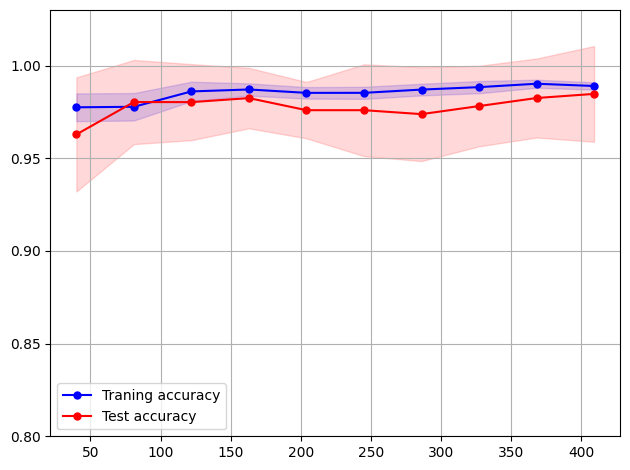

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe = make_pipeline(StandardScaler(),
                     LogisticRegression(penalty='l2',
                                        max_iter=10000))
train_size, train_score, test_score = learning_curve(pipe, train_input, train_target, 
                                                     n_jobs=-1, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)
plt.plot(train_size, train_mean,
         color='blue', marker='o',
         markersize=5, label='Traning accuracy')
plt.fill_between(train_size,
                 train_mean-train_std,
                 train_mean+train_std,
                 color='blue',
                 alpha=0.15)
plt.plot(train_size, test_mean,
         color='red', marker='o',
         markersize=5, label='Test accuracy')
plt.fill_between(train_size,
                 test_mean-test_std,
                 test_mean+test_std,
                 alpha=0.15,
                 color='red')
plt.ylim([0.8, 1.03])
plt.legend()
plt.grid()
plt.tight_layout()

(0.8, 1.03)

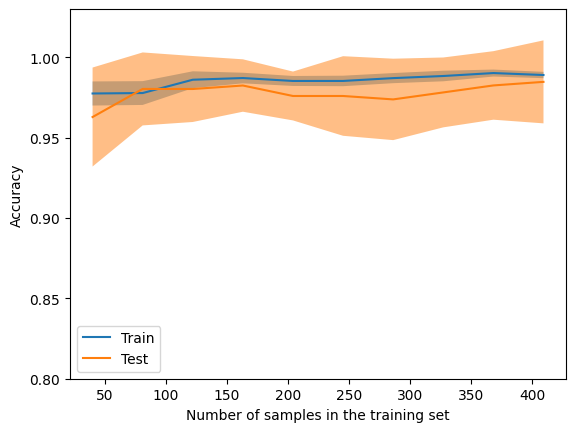

In [65]:
from sklearn.model_selection import LearningCurveDisplay
display = LearningCurveDisplay(train_sizes=train_size,
                               train_scores=train_score,
                               test_scores=test_score,
                               score_name='Accuracy')
display.plot(score_type='both')
plt.ylim([0.8, 1.03])

(0.8, 1.03)

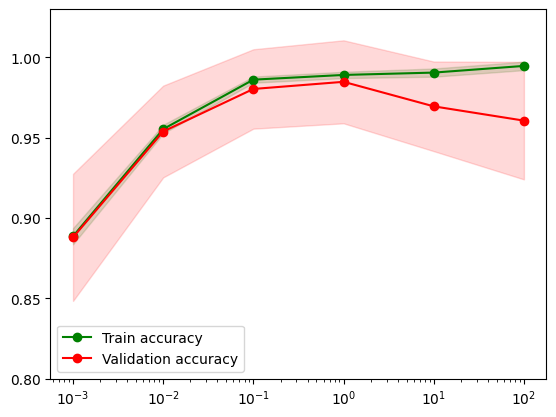

In [73]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe,
                                             X=train_input,
                                             y=train_target,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         marker='o', color='green', label='Train accuracy')
plt.fill_between(param_range,
                 train_mean-train_std,
                 train_mean+train_std,
                 color='green',
                 alpha=0.15)
plt.plot(param_range, test_mean,
         marker='o', color='red', label='Validation accuracy')
plt.fill_between(param_range,
                 test_mean-test_std,
                 test_mean+test_std,
                 color='red',
                 alpha=0.15)
plt.xscale('log')
plt.legend()
plt.ylim([0.8, 1.03])

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe = make_pipeline(StandardScaler(),
                 SVC(random_state=42))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C':param_range,
               'svc__kernel':['linear']},
              {'svc__C':param_range,
               'svc__gamma':param_range,
               'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1,
                  return_train_score=True)
gs = gs.fit(train_input, train_target)
print(gs.best_score_)
print(gs.best_params_)

0.9802898550724638
{'svc__C': 0.1, 'svc__kernel': 'linear'}


In [80]:
gs.score(test_input, test_target)

0.9824561403508771

In [81]:
gs.cv_results_['mean_train_score']

array([0.63955931, 0.93797424, 0.97826525, 0.98534856, 0.99023257,
       0.99316358, 0.99682629, 1.        , 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.77240324, 0.95140438,
       0.97314151, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.77338064, 0.95213728, 0.98217306, 0.98974536, 1.        ,
       1.        , 1.        , 1.        , 0.95042817, 0.98241696,
       0.98754726, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.98290536, 0.98681317, 0.99584948, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98681376,
       0.99194347, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [87]:
from sklearn.model_selection import RandomizedSearchCV
pipe = make_pipeline(StandardScaler(),
                     SVC(random_state=42))
param_grid = [{'svc__C':param_range,
               'svc__kernel':['linear']},
              {'svc__C':param_range,
               'svc__gamma':param_range,
               'svc__kernel':['rbf']}]
rs = RandomizedSearchCV(estimator=pipe,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=42,
                        n_jobs=-1)
rs = rs.fit(train_input, train_target)
print(rs.best_score_)
print(rs.best_params_)

0.9780676328502416
{'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 100.0}
